In [2]:
pip install qiskit

     |████████████████████████████████| 2.9MB 3.2MB/s 
     |████████████████████████████████| 23.0MB 1.3MB/s 
     |████████████████████████████████| 153kB 48.4MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 1.8MB 36.2MB/s 
     |████████████████████████████████| 5.6MB 37.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 296kB 30.1MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 573kB 46.6MB/s 
     |████████████████████████████████| 24.3MB 1.2MB/s 
     |████████████████████████████████| 2.7MB 38.5MB/s 
  Created wheel for qiskit: filename=qiskit-0.17.0-cp36-none-any.whl size=2897 sha256=d49d30ec78da52a09546c9b62b30b53b8927a85b70e4d1a17f1b9ad8a30f4838
  Stored in directory: /root/.cache/pip/wheels/a8/7e/29/98cef5ff01e3081f6d

In [0]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [0]:
backend = Aer.get_backend("qasm_simulator")

---

# Oracles:

## $U_{id}$

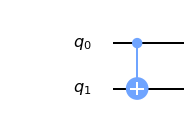

In [7]:
u_id_inner = QuantumCircuit(2, name='U_id')
u_id_inner.cnot(0,1);
u_id = u_id_inner.to_instruction()
u_id_inner.draw('mpl')

(Recall that in Qiskit the order of the tensors is from MSB to LSB: $Q_{n-1}\otimes \dotsb \otimes Q_{0}$.)

$U_{id}$ is defined by:
\begin{align}
|00\rangle & \mapsto |00\rangle \\
|01\rangle & \mapsto |11\rangle \\
|10\rangle & \mapsto |10\rangle \\
|11\rangle & \mapsto |01\rangle \\
\end{align}

Verification:
\begin{align}
CNOT_{0,1}|00\rangle & = |00\rangle \\
CNOT_{0,1}|01\rangle & = |11\rangle \\
CNOT_{0,1}|10\rangle & = |10\rangle \\
CNOT_{0,1}|11\rangle & = |01\rangle \\
\end{align}

## $U_{not}$

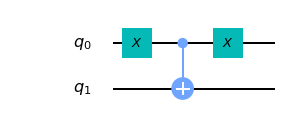

In [0]:
u_not_inner = QuantumCircuit(2, name='U_not')
u_not_inner.x(0)
u_not_inner.cnot(0,1)
u_not_inner.x(0)
u_not = u_not_inner.to_instruction()
u_not_inner.draw('mpl')

$U_{not}$ is defined by:
\begin{align}
|00\rangle & \mapsto |10\rangle \\
|01\rangle & \mapsto |01\rangle \\
|10\rangle & \mapsto |00\rangle \\
|11\rangle & \mapsto |11\rangle \\
\end{align}

Verification:
\begin{align}
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |00\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|01\rangle =
(I\otimes X)|11\rangle = |10\rangle\\
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |01\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|00\rangle =
(I\otimes X)|00\rangle = |01\rangle\\
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |10\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|11\rangle =
(I\otimes X)|01\rangle = |00\rangle\\
(I\otimes X)\circ CNOT_{0,1}\circ (I \otimes X) |11\rangle & = 
(I\otimes X)\circ CNOT_{0,1}|10\rangle =
(I\otimes X)|10\rangle = |11\rangle\\
\end{align}

## $U_{c_0}$

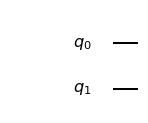

In [0]:
u_c0_inner = QuantumCircuit(2, name='U_c0')
u_c0 = u_c0_inner.to_instruction()
u_c0_inner.draw('mpl')

$U_{c_0}$ is defined by:
\begin{align}
|00\rangle & \mapsto |00\rangle \\
|01\rangle & \mapsto |01\rangle \\
|10\rangle & \mapsto |10\rangle \\
|11\rangle & \mapsto |11\rangle \\
\end{align}

Verification:
\begin{align}
|00\rangle & = |00\rangle \\
|01\rangle & = |01\rangle \\
|10\rangle & = |10\rangle \\
|11\rangle & = |11\rangle \\
\end{align}

## $U_{c_1}$

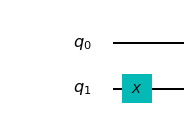

In [0]:
u_c1_inner = QuantumCircuit(2, name='U_c1')
u_c1_inner.x(1)
u_c1 = u_c1_inner.to_instruction()
u_c1_inner.draw('mpl')

$U_{c_1}$ is defined by:
\begin{align}
|00\rangle & \mapsto |10\rangle \\
|01\rangle & \mapsto |11\rangle \\
|10\rangle & \mapsto |00\rangle \\
|11\rangle & \mapsto |01\rangle \\
\end{align}

Verification:
\begin{align}
X\otimes I|00\rangle & = |10\rangle \\
X\otimes I|01\rangle & = |11\rangle \\
X\otimes I|10\rangle & = |00\rangle \\
X\otimes I|11\rangle & = |01\rangle \\
\end{align}

# The Deutsch algorithm:

In [0]:
c = QuantumCircuit(2,1)

In [0]:
c.x(1);

In [0]:
c.barrier();

In [0]:
c.h(0);
c.h(1);

In [0]:
c.append(u_id, [0, 1]);
# c.append(u_not, [0, 1]);
# c.append(u_c0, [0, 1]);
# c.append(u_c1, [0, 1]);

In [0]:
c.h(0);

In [0]:
c.barrier();

In [0]:
c.measure(0,0);

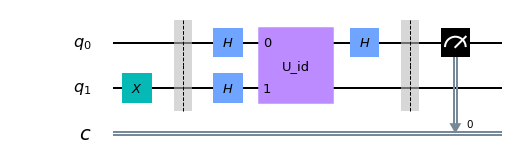

In [0]:
c.draw("mpl")
#c.decompose().draw("mpl")

# Experiment:

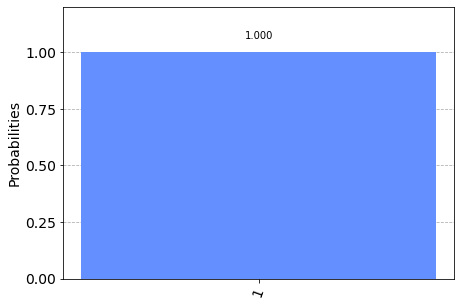

In [0]:
job = execute(c, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)

# Verifications:

## Deutsch$(U_{id})$

\begin{align}
U_{id}|-+\rangle & = U_{id}\tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
& = \tfrac{1}{2}(|00\rangle + |11\rangle - |10\rangle - |01\rangle)\\
& = |--\rangle\\
(I \otimes H)\circ U_{id}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{id}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{id}|-+\rangle\\
& = (I \otimes H)|--\rangle\\
& = |-1\rangle\\
\end{align}

## Deutsch$(U_{not})$

\begin{align}
U_{not}|-+\rangle & = U_{not}\tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
& = \tfrac{1}{2}(|10\rangle + |01\rangle - |00\rangle - |11\rangle)\\
& = -|--\rangle\\
(I \otimes H)\circ U_{not}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{not}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{not}|-+\rangle\\
& = -(I \otimes H)|--\rangle\\
& = -|-1\rangle\\
\end{align}

## Deutsch$(U_{c_0})$

\begin{align}
U_{c_0}|-+\rangle & = |-+\rangle\\
(I \otimes H)\circ U_{c_0}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{c_0}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{c_0}|-+\rangle\\
& = (I \otimes H)|-+\rangle\\
& = |-0\rangle\\
\end{align}

## Deutsch$(U_{c_1})$

\begin{align}
U_{c_1}|-+\rangle & = U_{c_1}\tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)\\
& = \tfrac{1}{2}(|10\rangle + |11\rangle - |00\rangle - |01\rangle)\\
& = -|-+\rangle\\
(I \otimes H)\circ U_{c_1}\circ (H \otimes H)\circ (X\otimes I)|00\rangle
& = (I \otimes H)\circ U_{c_1}\circ (H \otimes H)|10\rangle\\
& = (I \otimes H)\circ U_{c_1}|-+\rangle\\
& = -(I \otimes H)|-+\rangle\\
& = -|-0\rangle\\
\end{align}

---

Create a similar notebook inwhich you analyze Deutsch-Josza forn= 2. (That, is the function implementedby the oracle takes a 2-bit input and outputs one bit.) You need not implementevery possible oracle: choose two balanced functions and two constant functions.

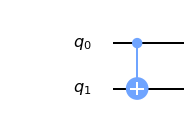

In [13]:
# Xor Balance Function
xor_in = QuantumCircuit(2, name='xor')
xor_in.cx(0,1)
xor = xor_in.to_instruction()
xor_in.draw('mpl')

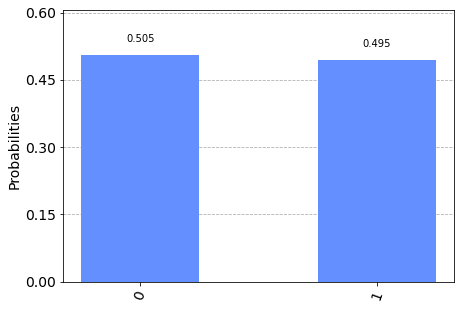

In [14]:
#build Qasm Simulator
backend = Aer.get_backend("qasm_simulator")
# two bit to one bit output
tbd = QuantumCircuit(2,1)
#apply hadamard gates
tbd.h(0)
tbd.h(1)
tbd.barrier()
# apply xor to get balanced gate
tbd.append(xor, [0,1]);
tbd.measure(0,0)
tbd.draw('mpl')
job = execute(tbd, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)


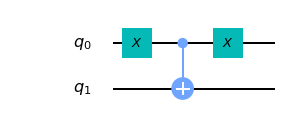

In [15]:
# unot gate is balanced when measuring any of the bits
u_not_in = QuantumCircuit(2, name='unot')
u_not_in.x(0)
u_not_in.cnot(0,1)
u_not_in.x(0)
u_not = u_not_in.to_instruction()
u_not_in.draw('mpl')

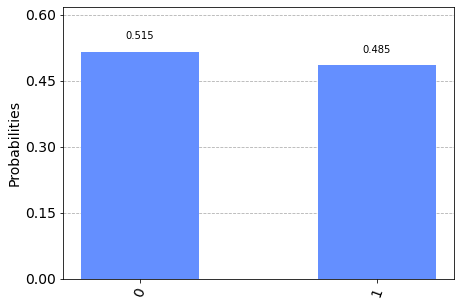

In [16]:
tbd2 = QuantumCircuit(2,1)
# hadamard
tbd2.h(0)
tbd2.h(1)
tbd2.barrier()
tbd2.append(u_not, [0,1])
tbd2.measure(0,0)
tbd2.draw('mpl')
job = execute(tbd2, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)

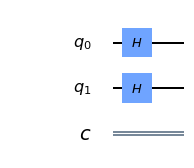

In [17]:
#constant function gate
con_in = QuantumCircuit(2,1)
# hadamard
con_in.h(0)
con_in.h(1)
con = con_in.to_instruction()
con_in.draw('mpl')

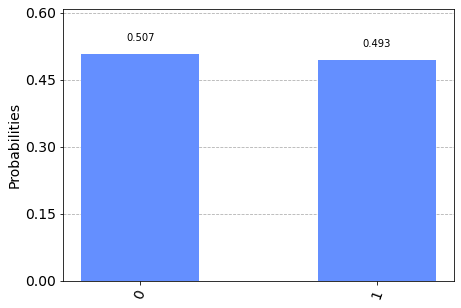

In [18]:
tbd3 = QuantumCircuit(2,1)
# hadamard
tbd3.barrier()
tbd3.x(1)

tbd3.append(con, [0,1])
tbd3.measure(0,0)
tbd3.draw('mpl')
job = execute(tbd3, backend=backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)